In [5]:
# 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, calinski_harabasz_score

# 데이터 불러오기

In [18]:
df = pd.read_csv('./RFM_analysis.csv')
df = df.iloc[:,1:]
df

,InvoiceDate,TotalPrice,InvoiceNo
0,18,0.00,2
1,214,4310.00,7
2,268,1797.24,4
3,325,1757.55,1
4,33,334.40,1
...,...,...,...
4367,66,180.60,1
4368,163,80.82,1
4369,221,176.60,3
4370,248,2094.88,16


In [19]:
x = df.to_numpy()
x

array([[1.80000e+01, 0.00000e+00, 2.00000e+00],
       [2.14000e+02, 4.31000e+03, 7.00000e+00],
       [2.68000e+02, 1.79724e+03, 4.00000e+00],
       ...,
       [2.21000e+02, 1.76600e+02, 3.00000e+00],
       [2.48000e+02, 2.09488e+03, 1.60000e+01],
       [1.42000e+02, 1.83728e+03, 3.00000e+00]])

# plot 함수 정의

In [33]:
def plot_clustering(data, model):
    unique_labels = np.unique(model.labels_)  # 군집 종류

    for i in unique_labels:  # 각 군집에 대해
        cluster_instance_mask = (model.labels_ == i)

        x_cluster_i = data[cluster_instance_mask, :]  # 해당 군집에 해당하는 인스턴스

        plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))  # 1번째, 2번째 변수를 이용해 plotting

    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
           s = 200, c = 'red', label = 'Centroids', marker = '*')
    
    plt.title('Clustering result1')
    plt.xlabel('InvoiceDate')
    plt.ylabel('TotalPrice')
    plt.legend()
    plt.show()
    
    for i in unique_labels:  # 각 군집에 대해
        cluster_instance_mask = (model.labels_ == i)

        x_cluster_i = data[cluster_instance_mask, :]  # 해당 군집에 해당하는 인스턴스

        plt.scatter(x_cluster_i[:, 1], x_cluster_i[:, 2], label='cluster ' + str(i))  # 1번째, 2번째 변수를 이용해 plotting

    plt.scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:, 2],
           s = 200, c = 'red', label = 'Centroids', marker = '*')
    plt.title('Clustering result1')
    plt.xlabel('TotalPrice')
    plt.ylabel('InvoiceNo')
    plt.legend()
    plt.show()
    
    for i in unique_labels:  # 각 군집에 대해
        cluster_instance_mask = (model.labels_ == i)

        x_cluster_i = data[cluster_instance_mask, :]  # 해당 군집에 해당하는 인스턴스

        plt.scatter(x_cluster_i[:, 2], x_cluster_i[:, 0], label='cluster ' + str(i))  # 1번째, 2번째 변수를 이용해 plotting

    plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:, 0],
           s = 200, c = 'red', label = 'Centroids', marker = '*')
    plt.title('Clustering result1')
    plt.xlabel('InvoiceNo')
    plt.ylabel('InvoiceDate')
    plt.legend()
    plt.show()
    return

In [86]:
# implement Gaussian Mixture Model (GMM)

def gaussianMixture_print(x, covariance_type, n_components):
    gmm = GaussianMixture(n_components=n_components, 
                        covariance_type=covariance_type)
    gmm.fit(x)
    
    proba = gmm.predict_proba(x)
    proba = proba.round(3)
    
    # result statistics
    n_instances, n_features = x.shape

    pi = gmm.weights_
    pi_around = np.around(pi, decimals=3)
    print('=== pi ===')
    for idx in range(n_components):
        print(f'pi_{idx}: {pi_around[idx]}')

    n = pi * n_instances
    print('=== N ===')
    for idx in range(n_components):
        print(f'N{idx}: {n[idx]}')
    print('n의 합:', sum(n))
    
    print('=== mu ===')
    for idx in range(n_components):
        print(f'mu_{idx}: {np.average(x, axis=0, weights=proba[:, idx])}')

    sigma = gmm.covariances_
    print('=== sigma ===')
    print(f'sigma: {sigma}')
    for idx in range(len(sigma)):
        print(f'sigma_{idx}:')
        print(sigma[idx])
        
    labels = gmm.predict(x)
        
    for idx in range(n_features):
        idx_next = idx+1
        if idx_next == n_features:
            idx_next = 0
        for i in range(n_components):  # 각 군집에 대해
            cluster_instance_mask = (labels == i)

            x_cluster_i = x[cluster_instance_mask, :]

            plt.scatter(x_cluster_i[:, idx], x_cluster_i[:, idx_next], s = 20, label='cluster ' + str(i))
            
            plt.scatter(gmm.means_[i][idx], gmm.means_[i][idx_next], s = 200, c = 'red', marker = '*')

        plt.title('Clustering result1')
        plt.xlabel(f'{df.columns[idx]}')
        plt.ylabel(f'{df.columns[idx_next]}')
        plt.legend()
        plt.show()

# 1. K-Means with silhouette

In [62]:
num_clusters_set = np.arange(2, 5)
num_clusters_set

array([2, 3, 4])

In [63]:
for num_clusters in num_clusters_set:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
    kmeans.fit(x)
    
    labels_pred = kmeans.labels_
    
    print('num_clusters: ', num_clusters, 
          '| silhouette: ', silhouette_score(x, labels_pred, metric='euclidean'))

num_clusters:  2 | silhouette:  0.9863544747565125
num_clusters:  3 | silhouette:  0.9631317560463997
num_clusters:  4 | silhouette:  0.8844615971927043


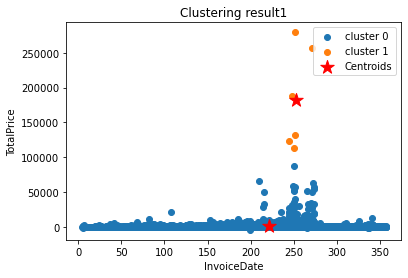

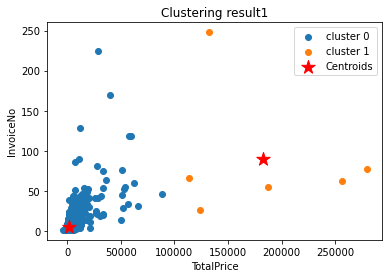

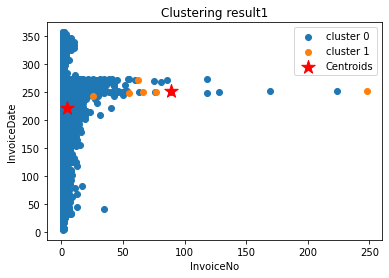

In [64]:
# 최적 군집 개수로 2 결정
kmeans_silhouette = KMeans(n_clusters=2, init='k-means++').fit(x)
plot_clustering(x, kmeans_silhouette)

# 1. K-Means with silhouette 결과 해석

- 결과 해석에 있어, 두 군집의 객체 수 차이가 매우 심함.
- cluster0의 경우 구매 빈도가 높거나 구매 금액이 높은 것을 고려하여 VIP로 분류할 수 있을 것 같다.
- cluster1은 최근성에 관계없이 구매금액이나 구매 횟수가 낮은 뜸한 고객으로 분류할 수 있다.

# 2. K-Means with CH-index

In [67]:
for num_clusters in num_clusters_set:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
    kmeans.fit(x)
    
    labels_pred = kmeans.labels_
    
    print('num_clusters: ', num_clusters, 
          '| CH-index: ', calinski_harabasz_score(x, labels_pred))

num_clusters:  2 | CH-index:  8530.021013028541
num_clusters:  3 | CH-index:  10923.908338079758
num_clusters:  4 | CH-index:  12766.876012236215


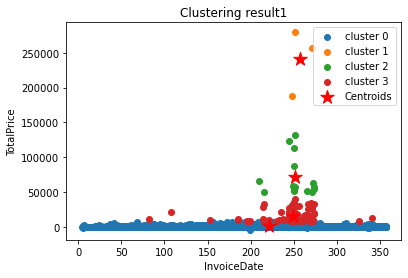

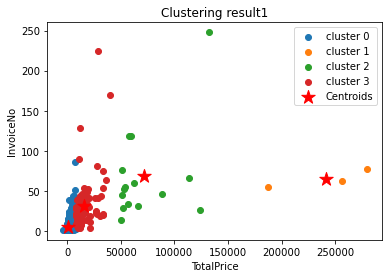

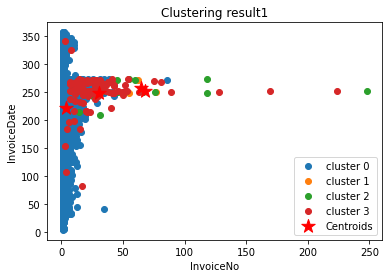

In [68]:
# 최적 군집 개수로 4 결정
kmeans_CH = KMeans(n_clusters=4, init='k-means++').fit(x)
plot_clustering(x, kmeans_CH)

# 2. K-Means with CH-index 결과 해석
- 최근성과 구매횟수보다 구매 금액에 따라 4분류의 고객으로 나뉨
- 다른 변수들 보다 구매 금액에 따른 구분이 확연해 보임
    - 따라서 이 4가지 분류는 고객 등급으로 볼 수 있음

# 3. GaussianMixture with silhouette

In [69]:
for cov_type in ("spherical", 'diag', 'tied', 'full'):
    print(f'========{cov_type}========')
    for num_clusters in num_clusters_set:
        gmm = GaussianMixture(n_components=num_clusters, covariance_type='full')
        gmm.fit(x)

        labels = gmm.predict(x)

        print('num_clusters: ', num_clusters, 
              '| silhouette: ', silhouette_score(x, labels, metric='euclidean'))

========spherical========
num_clusters:  2 | silhouette:  0.7349532169426723
num_clusters:  3 | silhouette:  0.4837669932924112
num_clusters:  4 | silhouette:  0.48014361480317613
========diag========
num_clusters:  2 | silhouette:  0.7346091544671215
num_clusters:  3 | silhouette:  0.6979572504778234
num_clusters:  4 | silhouette:  0.4842964908652916
========tied========
num_clusters:  2 | silhouette:  0.7346091544671215
num_clusters:  3 | silhouette:  0.48402677877812833
num_clusters:  4 | silhouette:  0.4839691669049652
========full========
num_clusters:  2 | silhouette:  0.7349532169426723
num_clusters:  3 | silhouette:  0.48402677877812833
num_clusters:  4 | silhouette:  0.4839691669049652


=== pi ===
pi_0: 0.864
pi_1: 0.136
=== N ===
N0: 3776.249935464682
N1: 595.7500645353198
n의 합: 4372.000000000002
=== mu ===
mu_0: [217.87328788 782.62027659   3.01397213]
mu_1: [ 245.83850978 8870.06196759   17.95548339]
=== sigma ===
sigma: [[[7.72759511e+03 3.83721191e+03 1.03566480e+01]
  [3.83721191e+03 5.55244023e+05 1.29470466e+03]
  [1.03566480e+01 1.29470466e+03 5.62366685e+00]]

 [[9.72226622e+02 2.94609185e+04 7.63258734e+01]
  [2.94609185e+04 4.34663173e+08 2.04557440e+05]
  [7.63258734e+01 2.04557440e+05 4.08544226e+02]]]
sigma_0:
[[7.72759511e+03 3.83721191e+03 1.03566480e+01]
 [3.83721191e+03 5.55244023e+05 1.29470466e+03]
 [1.03566480e+01 1.29470466e+03 5.62366685e+00]]
sigma_1:
[[9.72226622e+02 2.94609185e+04 7.63258734e+01]
 [2.94609185e+04 4.34663173e+08 2.04557440e+05]
 [7.63258734e+01 2.04557440e+05 4.08544226e+02]]


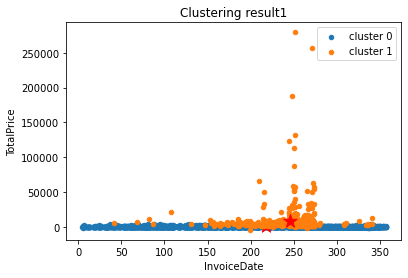

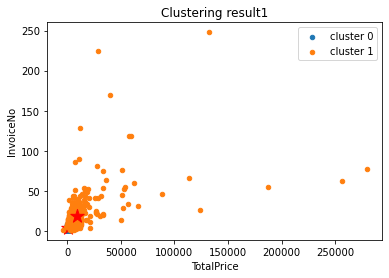

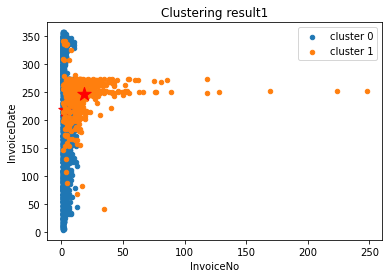

In [87]:
# 최대 군집 수 2개, covariance_type full로 결정
gaussianMixture_print(x, 'full', 2)

# 3. GaussianMixture with silhouette 결과 해석
- cluster 0의 경우, 최근성은 골고루 분포되어 있으나 구매횟수와 구매금액이 매우 적은 것으로 보아 단발성 고객으로 볼 수 있다.
- cluster 1은 구매금액 혹은 구매횟수가 높은 고객으로 신경써야할 고객으로 분류할 수 있다. 

# 4. GaussianMixture with CH-index

In [88]:
for cov_type in ("spherical", 'diag', 'tied', 'full'):
    print(f'========{cov_type}========')
    for num_clusters in num_clusters_set:
        gmm = GaussianMixture(n_components=num_clusters, covariance_type='full')
        gmm.fit(x)

        labels = gmm.predict(x)

        print('num_clusters: ', num_clusters, '| CH-index: ', calinski_harabasz_score(x, labels))

========spherical========
num_clusters:  2 | CH-index:  584.5967881301503
num_clusters:  3 | CH-index:  638.1273967187373
num_clusters:  4 | CH-index:  2576.2012422017015
========diag========
num_clusters:  2 | CH-index:  585.3081183520088
num_clusters:  3 | CH-index:  638.109710271727
num_clusters:  4 | CH-index:  2576.2012422017015
========tied========
num_clusters:  2 | CH-index:  585.3081183520088
num_clusters:  3 | CH-index:  4225.247375566935
num_clusters:  4 | CH-index:  2576.201242201701
========full========
num_clusters:  2 | CH-index:  584.5967881301503
num_clusters:  3 | CH-index:  638.1273967187373
num_clusters:  4 | CH-index:  823.8322010803709


=== pi ===
pi_0: 0.993
pi_1: 0.001
pi_2: 0.006
=== N ===
N0: 4340.927606246656
N1: 4.000000000000002
N2: 27.072393753344546
n의 합: 4372.000000000001
=== mu ===
mu_0: [ 221.52131894 1410.95742885    4.64111305]
mu_1: [2.53500000e+02 2.11783782e+05 5.50000000e+01]
mu_2: [  252.26434506 51487.38552061    70.54755804]
=== sigma ===
sigma: [[6.89288333e+03 1.89687499e+04 5.56140833e+01]
 [1.89687499e+04 1.24885402e+07 1.46984803e+04]
 [5.56140833e+01 1.46984803e+04 5.99835003e+01]]
sigma_0:
[ 6892.88332654 18968.7499484     55.61408329]
sigma_1:
[   18968.7499484  12488540.17139025    14698.48033646]
sigma_2:
[   55.61408329 14698.48033646    59.98350025]


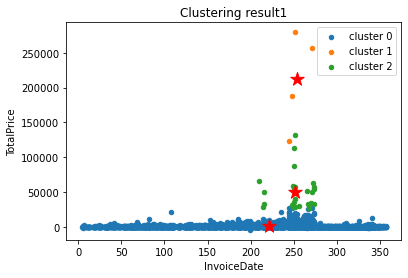

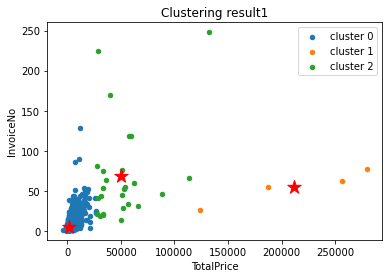

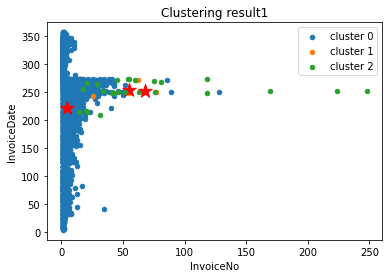

In [89]:
# covariance_type tied, 군집 개수 3으로 결정
gaussianMixture_print(x, 'tied', 3)

# 4. GaussianMixture with CH-index 결과 해석
- cluster 0은 구매 횟수, 최근성, 구매 금액 모두에서 상대적으로 작은 고객으로 분류 할 수 있다. 
- cluster 1은 구매금액 측면에서 가장 많은 금액을 소비였지만 구매 횟수가 상대적으로 작은 고객이다.
    - 특정 시점에 몰려서 구매한 것과 구매 금액이 적지 않은 것으로 보아, 마케팅이 필요하다고 볼 수 있다.
- cluster 2는 구매 횟수에 상관없이 일정 금액 이상을 소비한 고객으로 분류할 수 있다.

# 5. 총평
- 2개의 군집으로 분류할 경우, 각 군집의 차이가 매우 커서 유의미한 분류가 힘들어 보인다. 적어도 3개 이상으로 분류하는 것이 좋아보인다.
- 또한 CH-index를 활용해 군집을 분류한 결과는 두 방법 모두 의미있는 데이터를 뽑아 낼 수 있었다.